In [1]:
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup as bs
import nltk
import os

In [2]:
!pip install nltk

In [3]:
#Extracting reviews 
shoes_reviews = []
for i in range(1,30):
    shoes = []
    url =     url = "https://www.amazon.in/Puma-36970604-Mens-Running-Shoe/product-reviews/B08KJX1WZW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.find_all("span", {"data-hook":"review-body"})
    for i in range(len(reviews)):
        shoes.append(reviews[i].text)
    shoes_reviews = shoes_reviews+shoes

In [4]:
#saving extracted data
with open ("shoes.txt", "w", encoding = 'utf8') as output:
    output.write(str(shoes_reviews))

In [5]:
#Joining all the reviews into single paragraph
shoes_rev_str = " ".join(shoes_reviews)

In [6]:
shoes_rev_str

'\n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! please dont buy\n\n \n\n  I like it so much\n\n \n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! please dont buy\n\n \n\n  I like it so much\n\n \n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! please dont buy\n\n \n\n  I like it so much\n\n \n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! please dont buy\n\n \n\n  I like it so much\n\n \n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! please dont buy\n\n \n\n  I like it so much\n\n \n\n  Very bad shoe !!! Doesnt even fit well. Also doesnt look good at all\n\n \n\n  Dublicate produced\n\n \n\n  Broken box! ple

In [7]:
#Removing unwanted symbols
shoes_rev_str = re.sub("[^A-Za-z" "]+"," ",shoes_rev_str).lower()
shoes_rev_str = re.sub("[0-9" "]+"," ", shoes_rev_str)

In [8]:
#Now splitting the words as individual string
shoes_reviews_words = shoes_rev_str.split(" ")

In [9]:
#Removing the stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
with open("C:\\Users\\Public\\datascience assignment\\Text mining\\stop.txt", "r") as sw:
    stopwords = sw.read()

In [11]:
shoes_reviews_words = [w for w in shoes_reviews_words if not w in stopwords]

In [12]:
shoes_rev_str = " ".join(shoes_reviews_words)

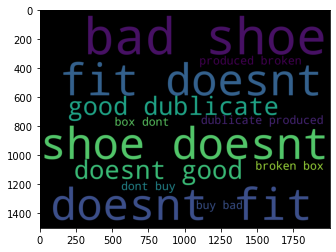

In [13]:
#Now creating wordcloud
from wordcloud import WordCloud
wordcloud_shoes = WordCloud(background_color = 'black', width = 2000, height = 1500).generate(shoes_rev_str)
plt.imshow(wordcloud_shoes)

In [14]:
#Extracting positive words from reviews 
with open ( "C:/Users/Public/datascience assignment/Text mining/positive.txt","r")as pos:
    positive_words = pos.read().split("\n")
    positive_words = positive_words[36:]

In [15]:
shoes_positive = " ".join([w for w in shoes_reviews_words if w in positive_words])

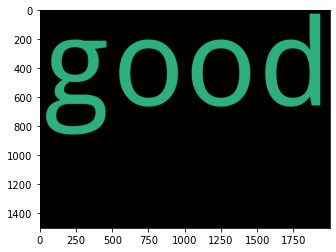

In [16]:
#Positive wordcloud
wordcloud_positive = WordCloud(background_color = 'black', width = 2000, height = 1500).generate(shoes_positive)
plt.imshow(wordcloud_positive)

In [17]:
#Extracting negative words from reviews
with open ("C:/Users/Public/datascience assignment/Text mining/negative.txt","r") as neg:
    negative_words = neg.read().split("\n")
    negative_words = negative_words[37:]

In [18]:
shoes_negative = " ".join([w for w in shoes_reviews_words if w in negative_words])

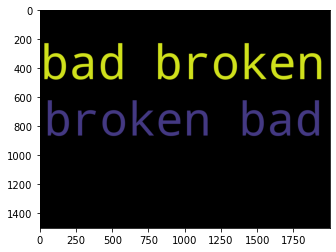

In [19]:
#Negative wordcloud
wordcloud_negative = WordCloud(background_color = 'black', width = 2000, height = 1500).generate(shoes_negative)
plt.imshow(wordcloud_negative)